In [ ]:
!pip install geopandas -q
!pip install networkx -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/MyDrive/Movement Between Tiles/Movement Between Tiles/Thashmitha_2020-03-04_2020-06-14_csv.zip' -d'/content/sample_data/data'

Archive:  /content/drive/MyDrive/Movement Between Tiles/Movement Between Tiles/Thashmitha_2020-03-04_2020-06-14_csv.zip
 extracting: /content/sample_data/data/862528398642951_2020-06-13_0000.csv  
 extracting: /content/sample_data/data/862528398642951_2020-06-13_0800.csv  
 extracting: /content/sample_data/data/862528398642951_2020-04-22_1600.csv  
 extracting: /content/sample_data/data/862528398642951_2020-04-28_1600.csv  
 extracting: /content/sample_data/data/862528398642951_2020-03-31_1600.csv  
 extracting: /content/sample_data/data/862528398642951_2020-05-04_1600.csv  
 extracting: /content/sample_data/data/862528398642951_2020-04-26_0800.csv  
 extracting: /content/sample_data/data/862528398642951_2020-04-25_1600.csv  
 extracting: /content/sample_data/data/862528398642951_2020-03-27_1600.csv  
 extracting: /content/sample_data/data/862528398642951_2020-04-19_1600.csv  
 extracting: /content/sample_data/data/862528398642951_2020-06-13_1600.csv  
 extracting: /content/sample_data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
path = '/content/sample_data/data'
files = glob.glob(path + "/*.csv")
df_files = (pd.read_csv(i) for i in files)
data   = pd.concat(df_files, ignore_index=True)

In [ ]:
data.head()

geometry         date_time  \
0  LINESTRING (103.83178710937499 1.2852925557435...  2020-06-07 16:00   
1  LINESTRING (103.853759765625 1.28529255574351,...  2020-06-07 16:00   
2  LINESTRING (103.59008789062501 1.4610232537755...  2020-06-07 16:00   
3  LINESTRING (103.568115234375 1.461023253775572...  2020-06-07 16:00   
4  LINESTRING (103.59008789062501 1.4610232537755...  2020-06-07 16:00   

   start_polygon_id start_polygon_name  end_polygon_id end_polygon_name  \
0            826266        Bukit Merah          826299          Punggol   
1            826268               City          826299          Punggol   
2            551153           Jelutong          551153         Jelutong   
3            551153           Jelutong          551153         Jelutong   
4            551153           Jelutong          551153         Jelutong   

   length_km  tile_size country   level  ...  n_difference  percent_change  \
0  15.640162         14      SG  LEVEL5  ...          -6.8      -27.419355   
1  14.242584         14      SG  LEVEL5  ...         -93.8      -88.657845   
2   0.000000         14      MY  LEVEL4  ...        -100.2       -4.298216   
3   0.000000         14      MY  LEVEL4  ...          65.2       19.591346   
4   2.442457         14      MY  LEVEL4  ...          -4.4       -8.239700   

   is_statistically_significant   z_score  start_lat   start_lon  end_lat  \
0                           0.0 -0.984577   1.277044  103.822566  1.41000   
1                           0.0 -3.481964   1.289292  103.854216  1.41000   
2                           0.0 -0.527908   1.462830  103.574354  1.46283   
3                           0.0  1.995368   1.462830  103.574354  1.46283   
4                           0.0 -0.401162   1.462830  103.574354  1.46283   

      end_lon   start_quadkey     end_quadkey  
0  103.902744  13223223110303  13223221333222  
1  103.902744  13223223110312  13223221333222  
2  103.574354  13223221323203  13223221323203  
3  103.574354  13223221323203  13223221323203  
4  103.574354  13223221323203  13223221323203  

[5 rows x 22 columns]

In [ ]:
data.shape

(2064527, 22)

In [ ]:
data.columns

Index(['geometry', 'date_time', 'start_polygon_id', 'start_polygon_name',
       'end_polygon_id', 'end_polygon_name', 'length_km', 'tile_size',
       'country', 'level', 'n_crisis', 'n_baseline', 'n_difference',
       'percent_change', 'is_statistically_significant', 'z_score',
       'start_lat', 'start_lon', 'end_lat', 'end_lon', 'start_quadkey',
       'end_quadkey'],
      dtype='object')

In [ ]:
# Jurong West
data_jurong=data[data['start_polygon_name']=='Jurong West']

In [ ]:
data_jurong.shape

(80981, 22)

In [ ]:
data_jurong.head()

geometry         date_time  \
58   LINESTRING (103.69995117187499 1.3511930734713...  2020-04-30 08:00   
73   LINESTRING (103.72192382812501 1.3511930734713...  2020-04-30 08:00   
77   LINESTRING (103.699951171875 1.329226428570251...  2020-04-30 08:00   
335  LINESTRING (103.69995117187499 1.3511930734713...  2020-04-30 08:00   
336  LINESTRING (103.721923828125 1.329226428570251...  2020-04-30 08:00   

     start_polygon_id start_polygon_name  end_polygon_id end_polygon_name  \
58             826280        Jurong West          826311      Pulau Brani   
73             826280        Jurong West          826311      Pulau Brani   
77             826280        Jurong West          826311      Pulau Brani   
335            826280        Jurong West          826302           Mandai   
336            826280        Jurong West          826302           Mandai   

     length_km  tile_size country   level  ...  n_difference  percent_change  \
58   17.613951         14      SG  LEVEL5  ...           NaN      -56.896552   
73   15.640371         14      SG  LEVEL5  ...           NaN      -63.636364   
77   16.385635         14      SG  LEVEL5  ...           NaN       38.888889   
335  15.639805         14      SG  LEVEL5  ...          -7.6      -28.571429   
336  15.639877         14      SG  LEVEL5  ...         -18.0      -60.000000   

     is_statistically_significant   z_score  start_lat   start_lon   end_lat  \
58                            0.0 -2.164225   1.341656  103.704791  1.259505   
73                            0.0 -1.492405   1.341656  103.704791  1.259505   
77                            0.0  1.009050   1.341656  103.704791  1.259505   
335                           0.0 -1.105053   1.341656  103.704791  1.423562   
336                           0.0 -3.753259   1.341656  103.704791  1.423562   

        end_lon   start_quadkey     end_quadkey  
58   103.833445  13223223101131  13223223110321  
73   103.833445  13223223101131  13223223110321  
77   103.833445  13223223101131  13223223110321  
335  103.802446  13223223101131  13223221332322  
336  103.802446  13223223101131  13223221332322  

[5 rows x 22 columns]

In [ ]:
!unzip '/content/gadm41_SGP_shp.zip'

Archive:  /content/gadm41_SGP_shp.zip
 extracting: gadm41_SGP_0.cpg        
  inflating: gadm41_SGP_0.dbf        
  inflating: gadm41_SGP_0.prj        
  inflating: gadm41_SGP_0.shp        
  inflating: gadm41_SGP_0.shx        
 extracting: gadm41_SGP_1.cpg        
  inflating: gadm41_SGP_1.dbf        
  inflating: gadm41_SGP_1.prj        
  inflating: gadm41_SGP_1.shp        
  inflating: gadm41_SGP_1.shx        


In [ ]:
date=data_jurong['date_time'].unique()

In [ ]:
end=data_jurong['end_polygon_name'].unique()

In [ ]:
end

array(['Pulau Brani', 'Mandai', 'Marine Parade', 'Punggol', 'Jurong East',
       'Sembawang', 'Hougang', 'Sengkang', 'Yishun', 'Jurong West',
       'Pasir Ris', 'Tanglin', 'Clementi', 'Bukit Batok', 'Queenstown',
       'Tampines', 'Geylang', 'City', 'Woodlands', 'Serangoon',
       'Bukit Timah', 'Choa Chu Kang', 'Tuas', 'Simpang', 'Bukit Merah',
       'Changi', 'Western Catchment Area', 'Boon Lay and Pioneer',
       'Rochor', 'Jurong Island', 'Bedok', 'Paya Lebar', 'Southern',
       'Kallang', 'Bukit Panjang', 'Toa Payoh', 'Orchard', 'Bishan',
       'Sungei Kadut', 'Ang Mo Kio', 'Seletar', 'Marina', 'Novena',
       'Lim Chu Kang', 'Central Catchment Area'], dtype=object)

In [ ]:
data_jurong[data_jurong['end_polygon_name']=='Bishan']['end_lat']

4302       1.355109
4303       1.355109
4517       1.355109
13770      1.355109
13771      1.355109
             ...   
2062485    1.355109
2062486    1.355109
2062487    1.355109
2062881    1.355109
2062882    1.355109
Name: end_lat, Length: 1567, dtype: float64

In [ ]:
count=[]
date_time=[]
start_dest=[]
end_dest=[]
for i in date:
  x=data_jurong[data_jurong['date_time']==i]
  for j in end:
    count.append(x[x['end_polygon_name']==j].shape[0])
    date_time.append(i[0:10])
    start_dest.append('Jurong West')
    end_dest.append(j)


In [ ]:
dict = {'date_time': date_time, 'start_polygon_name': start_dest,'count':count, 'end_polygon_name': end_dest}
start_df = pd.DataFrame(dict)

In [ ]:
start_df.shape

(13770, 4)

In [ ]:
start_df.head()

date_time start_polygon_name  count end_polygon_name
0  2020-04-30        Jurong West      3      Pulau Brani
1  2020-04-30        Jurong West      5           Mandai
2  2020-04-30        Jurong West      4    Marine Parade
3  2020-04-30        Jurong West      2          Punggol
4  2020-04-30        Jurong West     10      Jurong East

In [ ]:
start_data = start_df.groupby(['date_time','start_polygon_name', 'end_polygon_name'], as_index=False)['count'].sum()

In [ ]:
start_data.shape

(4590, 4)

In [ ]:
start_name=start_data['start_polygon_name'].to_list()
date=start_data['date_time'].to_list()
count=start_data['count'].to_list()
end_name=start_data['end_polygon_name'].to_list()

In [ ]:
start_latitude=[]
start_longitude=[]
end_latitude=[]
end_longitude=[]
for i in start_name:
  start_latitude.append(data_jurong[data_jurong['start_polygon_name']==i]['start_lat'].unique()[0])
  start_longitude.append(data_jurong[data_jurong['start_polygon_name']==i]['start_lon'].unique()[0])


In [ ]:
geometry=[]
for i in end_name:
  geometry.append(data_jurong[data_jurong['end_polygon_name']==i]['geometry'].unique()[0])

In [ ]:
len(geometry)

4590

In [ ]:
for i in end_name:
  end_latitude.append(data_jurong[data_jurong['end_polygon_name']==i]['end_lat'].unique()[0])
  end_longitude.append(data_jurong[data_jurong['end_polygon_name']==i]['end_lon'].unique()[0])

In [ ]:
dict = {'date': date, 'start_polygon_name': start_name,'start_lat':start_latitude,'start_lon':start_longitude,
        'end_polygon_name': end_name,'end_lat':end_latitude,'end_lon':end_longitude, 'count':count,'geometry': geometry}
data_jurong_west = pd.DataFrame(dict)

In [ ]:
data_jurong_west.shape

(4590, 9)

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry1 = [Point(xy) for xy in zip(data_jurong_west['end_lon'],data_jurong_west['end_lat'])]
gdf = GeoDataFrame(data_jurong_west, geometry=geometry1)
#this is a simple map that goes with geopandas
country= gpd.read_file('/content/gadm41_SGP_0.shp')
gdf.plot(ax=country.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

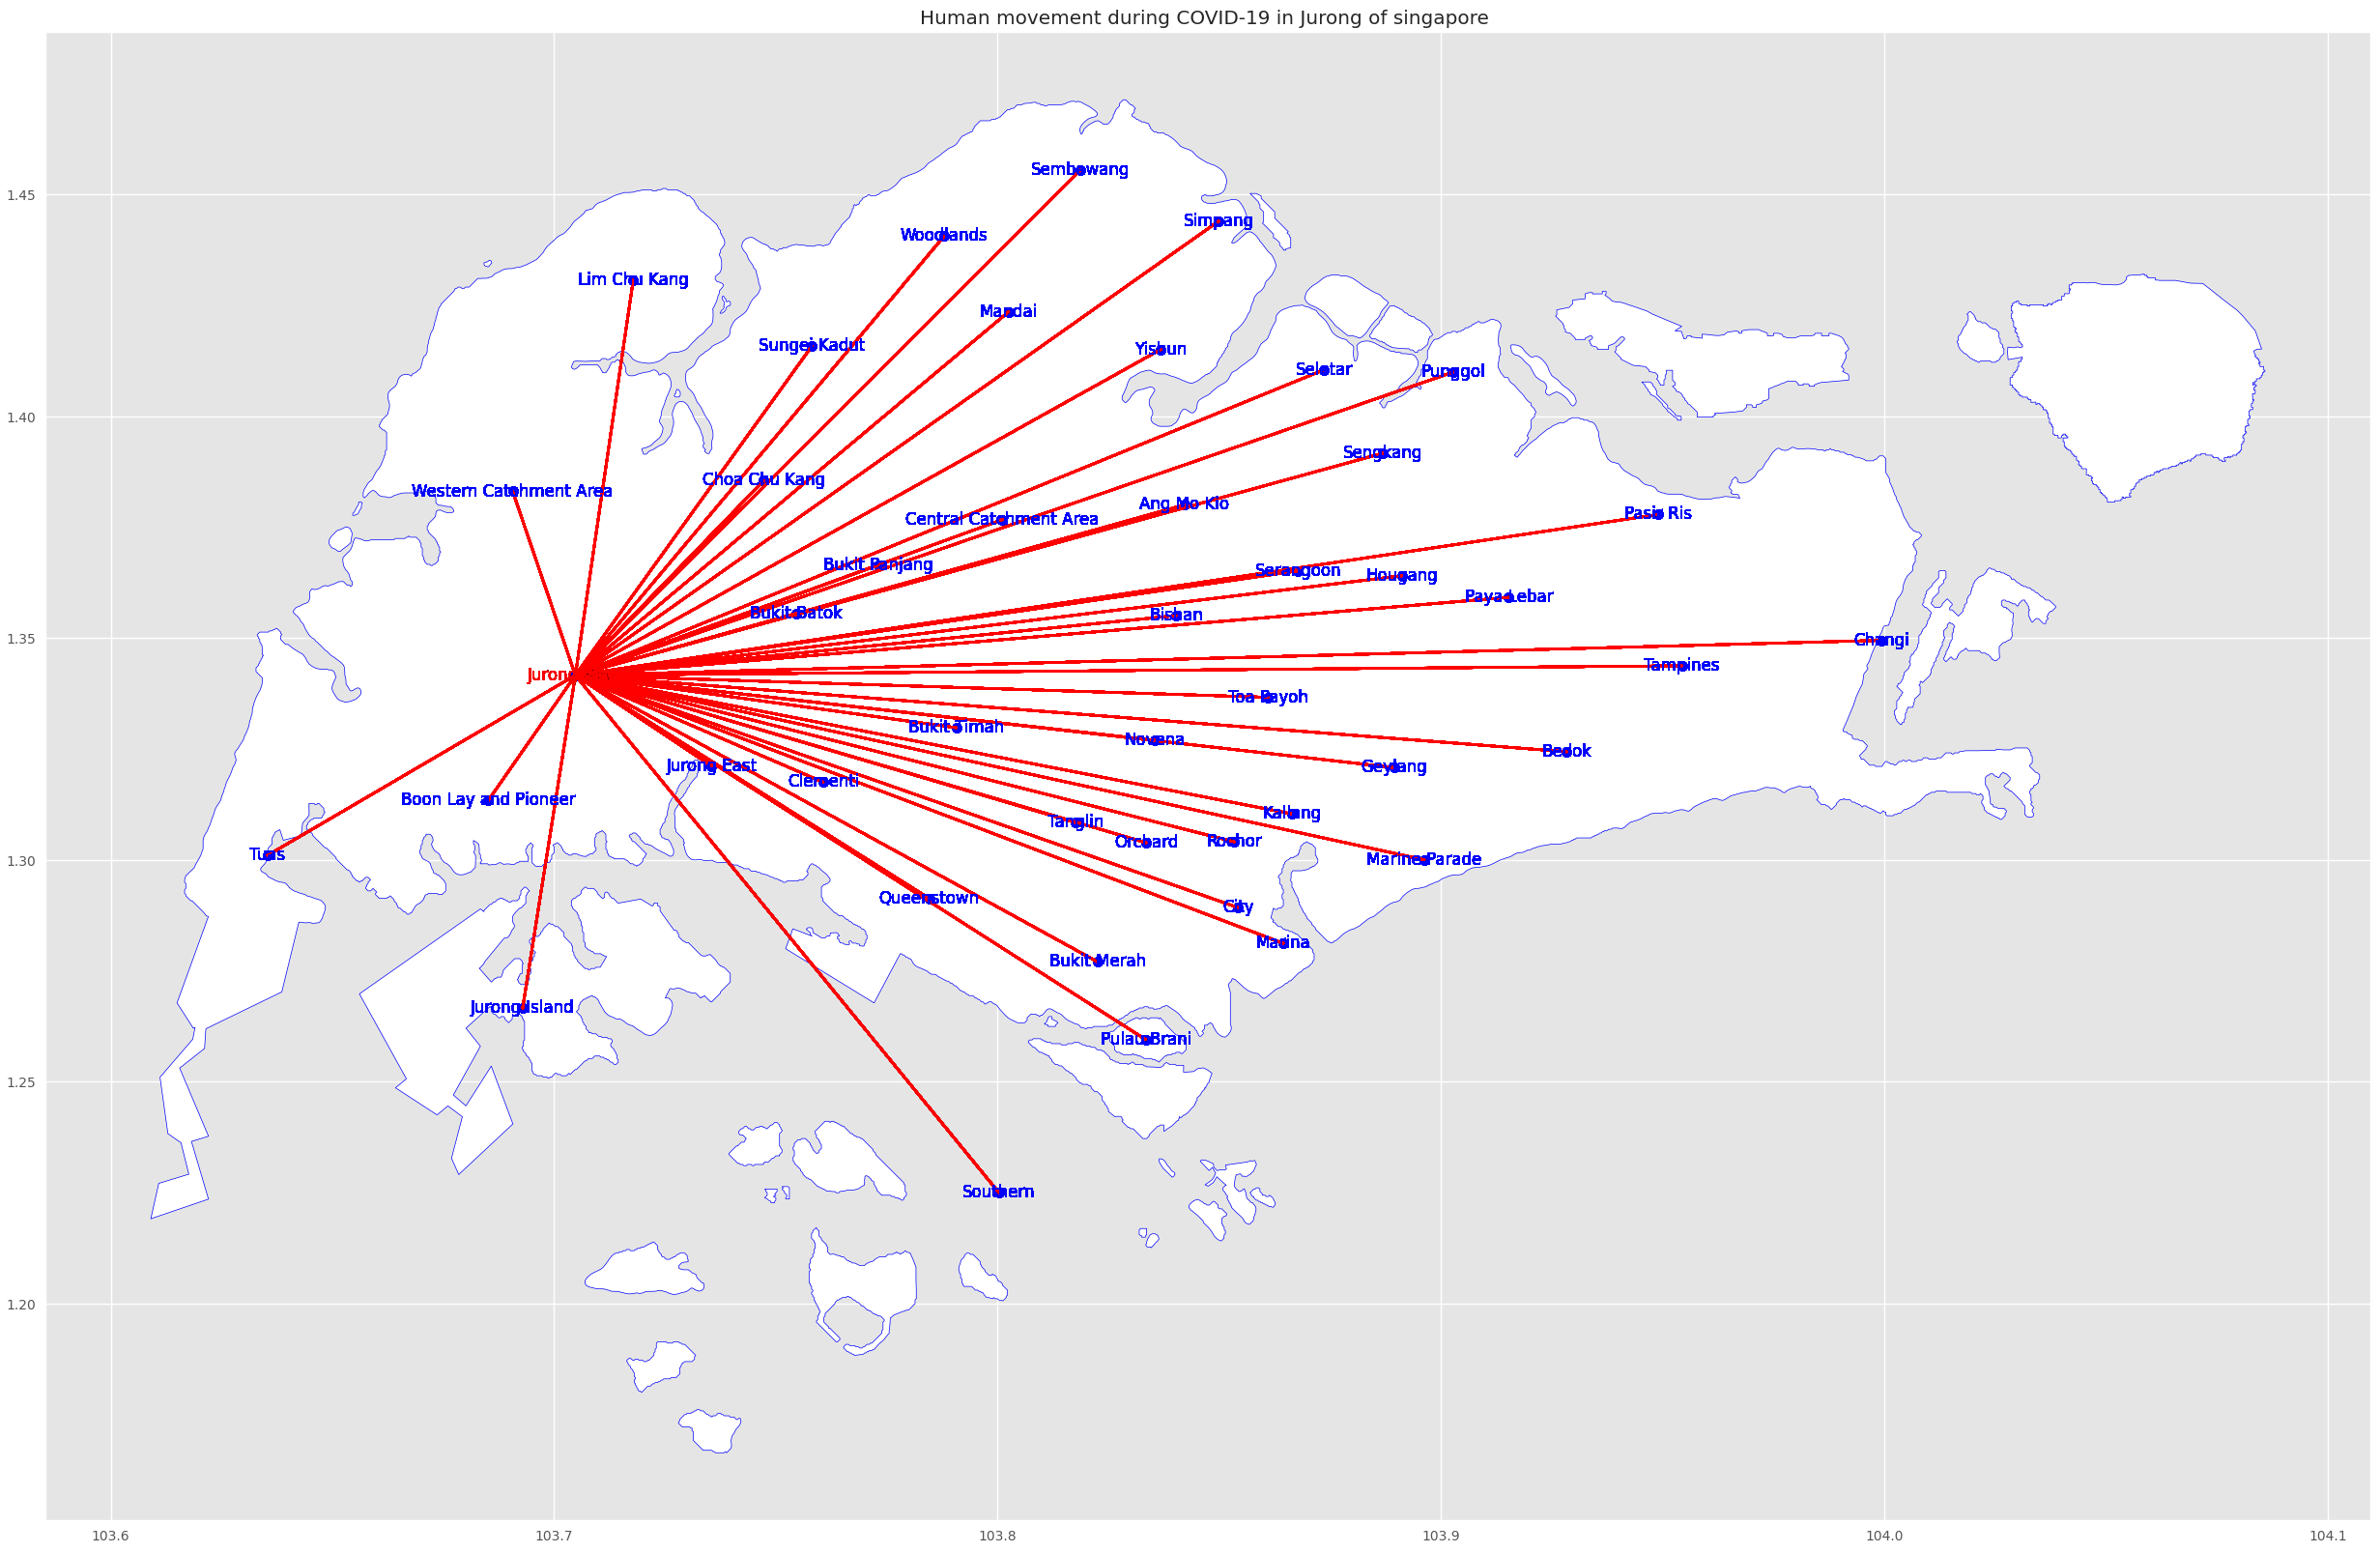

In [ ]:
with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    country.plot(figsize=(35,20), edgecolor="blue", color="white");

    for slat, dlat, slon, dlon, src_cty, dest_cty in zip(data_jurong_west['start_lat'],data_jurong_west['end_lat'],data_jurong_west['start_lon'],data_jurong_west['end_lon'],data_jurong_west['start_polygon_name'],data_jurong_west['end_polygon_name']):
        plt.plot([slon , dlon], [slat, dlat], color="red", alpha=0.5)
        plt.scatter( [slon, dlon], [slat, dlat], color="blue", alpha=0.1)
        plt.text(slon, slat, src_cty, fontsize=12, color="red", alpha=0.4, horizontalalignment='center', verticalalignment='center')
        plt.text(dlon, dlat, dest_cty, fontsize=12, color="blue", alpha=0.9, horizontalalignment='center', verticalalignment='center')

    plt.title("Human movement during COVID-19 in Jurong of singapore ")

    # plt.savefig("COVID WAVE-1 TRAVELLING PATTERN.png", dpi=100)

In [ ]:
data_jurong_west.to_csv('data_jurong_west_2020_3_to_2020_6.csv',index=False)

In [ ]:
# considering singapore's travel data only
# for now not considering malaysia and indonesia data
data_sg=data[(data['country']=='SG')]

In [ ]:
data_sg.shape

(1357019, 22)

In [ ]:
# data which have the same destination are not considered
sm_dest= data_sg[ (data_sg['start_polygon_name']==data_sg['end_polygon_name'])].index
data_sg.drop(sm_dest , inplace=True)


<ipython-input-10-e354091665a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sg.drop(sm_dest , inplace=True)


In [ ]:
data_sg.shape

(1281048, 22)

In [ ]:
# ignore the columns 'level', 'n_crisis', 'n_baseline', 'n_difference', 'percent_change', 'is_statistically_significant', 'z_score', 'tile_size'
data_sg.drop([ 'level', 'n_crisis', 'n_baseline', 'n_difference', 'percent_change', 'is_statistically_significant', 'z_score', 'tile_size'],axis=1,inplace=True)

<ipython-input-12-da7df61a43a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sg.drop([ 'level', 'n_crisis', 'n_baseline', 'n_difference', 'percent_change', 'is_statistically_significant', 'z_score', 'tile_size'],axis=1,inplace=True)


In [ ]:
data_sg.shape

(1281048, 14)

In [ ]:
data_sg.sort_values(by='date_time',inplace=True)

<ipython-input-14-a0730821ffab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sg.sort_values(by='date_time',inplace=True)


In [ ]:
data_sg.head(3)

geometry         date_time  \
1908287  LINESTRING (103.963623046875 1.351193073471328...  2020-03-04 00:00   
1908194  LINESTRING (103.831787109375 1.439057634363863...  2020-03-04 00:00   
1908193  LINESTRING (103.87573242187501 1.3731595197280...  2020-03-04 00:00   

         start_polygon_id start_polygon_name  end_polygon_id  \
1908287            826277           Tampines          826295   
1908194            826282             Yishun          826291   
1908193            826286          Serangoon          826291   

             end_polygon_name  length_km country  start_lat   start_lon  \
1908287  Boon Lay and Pioneer  31.847390      SG   1.343800  103.954317   
1908194           Bukit Timah  13.153472      SG   1.415115  103.836799   
1908193           Bukit Timah  10.923515      SG   1.365201  103.867761   

          end_lat     end_lon   start_quadkey     end_quadkey  
1908287  1.313452  103.685152  13223223111031  13223223101310  
1908194  1.329838  103.790712  13223221332323  13223223110033  
1908193  1.329838  103.790712  13223223110113  13223223110033

In [ ]:
data_sg.tail(3)

geometry         date_time  \
1216108  LINESTRING (103.94165039062499 1.3731595197280...  2020-06-13 16:00   
1216119  LINESTRING (103.765869140625 1.329226428570251...  2020-06-13 16:00   
1216040  LINESTRING (103.963623046875 1.329226428570251...  2020-06-13 16:00   

         start_polygon_id start_polygon_name  end_polygon_id end_polygon_name  \
1216108            826285          Pasir Ris          826299          Punggol   
1216119            826264           Clementi          826273          Kallang   
1216040            826277           Tampines          826299          Punggol   

         length_km country  start_lat   start_lon   end_lat     end_lon  \
1216108   3.454271      SG   1.377904  103.948918  1.410000  103.902744   
1216119  12.454891      SG   1.317559  103.760675  1.310413  103.866410   
1216040   8.806779      SG   1.343800  103.954317  1.410000  103.902744   

          start_quadkey     end_quadkey  
1216108  13223223111012  13223221333222  
1216119  13223223110210  13223223110311  
1216040  13223223111031  13223221333222

In [ ]:
# list of unique places of start of polygon/start destination point
st_dest=data_sg['start_polygon_name'].unique()

In [ ]:
st_dest

array(['Tampines', 'Yishun', 'Serangoon', 'Woodlands', 'Bukit Batok',
       'Bedok', 'Sembawang', 'Tanglin', 'Clementi', 'Orchard', 'Sengkang',
       'Bishan', 'Kallang', 'Geylang', 'Novena', 'Queenstown',
       'Sungei Kadut', 'Jurong West', 'Boon Lay and Pioneer', 'Toa Payoh',
       'Ang Mo Kio', 'Bukit Panjang', 'City', 'Mandai', 'Jurong East',
       'Simpang', 'Bukit Merah', 'Western Catchment Area',
       'Marine Parade', 'Pasir Ris', 'Choa Chu Kang', 'Punggol', 'Rochor',
       'Tuas', 'Paya Lebar', 'Changi', 'Hougang', 'Bukit Timah',
       'Pulau Brani', 'Jurong Island', 'Central Catchment Area', 'Marina',
       'Southern', 'Seletar', 'Lim Chu Kang', 'Pulau Ubin',
       'Pulau Tekong'], dtype=object)

In [ ]:
date=data_sg['date_time'].unique()

In [ ]:
date[0][0:10]

'2020-03-04'

In [ ]:
data_sg[data_sg['start_polygon_name']=='Pulau Ubin']['start_lat'].unique()[0]

1.4132972070748615

OUTWARD VECTOR

START POINT OF DESTINATION /START_POLYGON


In [ ]:
# to understand the initial travel pattern of people in start destination place of singapore
# finding count of total people of start of destination area
# list of date_time,count,place,latitude,longitude, start_dest(polygon+name)
count=[]
date_time=[]
start_dest=[]
# end_dest=[]
for i in date:
  x=data_sg[data_sg['date_time']==i]
  for j in st_dest:
    count.append(x[x['start_polygon_name']==j].shape[0])
    date_time.append(i[0:10])
    start_dest.append(j)


    # print(x[x['start_polygon_name']==j].shape[0],i,j,data_sg[data_sg['start_polygon_name']==j]['start_lat'].unique()[0],data_sg[data_sg['start_polygon_name']==j]['start_lon'].unique()[0])

In [ ]:
len(count)

14382

In [ ]:
len(date_time)

14382

In [ ]:
len(start_dest)

14382

In [ ]:
dict = {'date_time': date_time, 'start_polygon_name': start_dest,'count':count}
start_df = pd.DataFrame(dict)

In [ ]:
start_df.shape

(14382, 3)

In [ ]:
start_df.head()

date_time start_polygon_name  count
0  2020-03-04           Tampines    208
1  2020-03-04             Yishun    304
2  2020-03-04          Serangoon    171
3  2020-03-04          Woodlands     98
4  2020-03-04        Bukit Batok    177

In [ ]:
start_df[start_df['start_polygon_name']=='Tampines']

In [ ]:
start_data = start_df.groupby(['date_time','start_polygon_name'], as_index=False)['count'].sum()

In [ ]:
# 8hr data which was updated for 00,08,16 is converted into single day data
# the size before=14382
#  14382//3 = 4794
start_data.shape

(4794, 3)

In [ ]:
start_data.head()

date_time    start_polygon_name  count
0  2020-03-04            Ang Mo Kio    579
1  2020-03-04                 Bedok    620
2  2020-03-04                Bishan    413
3  2020-03-04  Boon Lay and Pioneer    545
4  2020-03-04           Bukit Batok    456

In [ ]:
start_name=start_data['start_polygon_name'].to_list()
date=start_data['date_time'].to_list()
count=start_data['count'].to_list()

In [ ]:
len(start_name)

4794

In [ ]:
start_latitude=[]
start_longitude=[]
for i in start_name:
  start_latitude.append(data_sg[data_sg['start_polygon_name']==i]['start_lat'].unique()[0])
  start_longitude.append(data_sg[data_sg['start_polygon_name']==i]['start_lon'].unique()[0])

In [ ]:
dict = {'date': date, 'start_polygon_name': start_name,'count':count,'start_lat':start_latitude,'start_lon':start_longitude}
data_start_dest = pd.DataFrame(dict)

In [ ]:
data_start_dest.shape

(4794, 5)

In [ ]:
data_start_dest.head(20)

date      start_polygon_name  count  start_lat   start_lon
0   2020-03-04              Ang Mo Kio    579   1.380089  103.842151
1   2020-03-04                   Bedok    620   1.324424  103.928330
2   2020-03-04                  Bishan    413   1.355109  103.840232
3   2020-03-04    Boon Lay and Pioneer    545   1.313452  103.685152
4   2020-03-04             Bukit Batok    456   1.355606  103.754680
5   2020-03-04             Bukit Merah    476   1.277044  103.822566
6   2020-03-04           Bukit Panjang    298   1.366527  103.773188
7   2020-03-04             Bukit Timah    285   1.329838  103.790712
8   2020-03-04  Central Catchment Area    101   1.376751  103.801100
9   2020-03-04                  Changi    512   1.349534  103.999318
10  2020-03-04           Choa Chu Kang    490   1.385518  103.747229
11  2020-03-04                    City    245   1.289292  103.854216
12  2020-03-04                Clementi    431   1.317559  103.760675
13  2020-03-04                 Geylang    482   1.320856  103.889452
14  2020-03-04                 Hougang    227   1.364087  103.891159
15  2020-03-04             Jurong East    570   1.321199  103.735510
16  2020-03-04           Jurong Island    249   1.266605  103.692896
17  2020-03-04             Jurong West    938   1.341656  103.704791
18  2020-03-04                 Kallang    235   1.310413  103.866410
19  2020-03-04            Lim Chu Kang     36   1.430721  103.717832

In [ ]:
data_start_dest.tail(10)

date      start_polygon_name  count  start_lat   start_lon
4784  2020-06-13                 Simpang     98   1.444034  103.849858
4785  2020-06-13                Southern     23   1.224998  103.800333
4786  2020-06-13            Sungei Kadut    409   1.415832  103.758102
4787  2020-06-13                Tampines    456   1.343800  103.954317
4788  2020-06-13                 Tanglin    123   1.308459  103.817597
4789  2020-06-13               Toa Payoh    211   1.336689  103.860971
4790  2020-06-13                    Tuas    260   1.301052  103.635358
4791  2020-06-13  Western Catchment Area     69   1.383111  103.690657
4792  2020-06-13               Woodlands    223   1.440669  103.787960
4793  2020-06-13                  Yishun    566   1.415115  103.836799

In [ ]:
data_start_dest.to_csv('data_start_dest_2020_3_4_to_2020_6_13.csv',index=False)

END_POLYGON OR DESTINATION PLACE  OR

INWARD VECTOR

In [ ]:
end_dest_unique=data_sg['end_polygon_name'].unique()

In [ ]:
(end_dest_unique)

array(['Boon Lay and Pioneer', 'Bukit Timah', 'Choa Chu Kang',
       'Queenstown', 'Jurong East', 'Kallang', 'Bedok', 'Novena',
       'Geylang', 'Southern', 'Bukit Merah', 'Ang Mo Kio', 'Sungei Kadut',
       'Simpang', 'Toa Payoh', 'Bukit Batok', 'Marine Parade', 'Mandai',
       'Changi', 'Bukit Panjang', 'Marina', 'Tampines', 'Tanglin',
       'Punggol', 'Serangoon', 'Woodlands', 'Jurong West', 'Clementi',
       'Paya Lebar', 'Jurong Island', 'Rochor', 'Lim Chu Kang',
       'Western Catchment Area', 'Orchard', 'Seletar', 'City',
       'Pasir Ris', 'Sembawang', 'Central Catchment Area', 'Yishun',
       'Tuas', 'Pulau Brani', 'Bishan', 'Hougang', 'Sengkang',
       'Pulau Ubin', 'Pulau Tekong'], dtype=object)

In [ ]:
date=data_sg['date_time'].unique()

In [ ]:
len(date)

306

In [ ]:
# to understand the initial travel pattern of people in END point of  destination place of singapore
# finding count of total people of end point of destination area
# list of date_time,count,place,latitude,longitude, end_dest(polygon+name)
count=[]
date_time=[]
end_dest=[]
# end_dest=[]
for i in date:
  x=data_sg[data_sg['date_time']==i]
  for j in end_dest_unique:
    count.append(x[x['end_polygon_name']==j].shape[0])
    date_time.append(i[0:10])
    end_dest.append(j)

    # print(x[x['start_polygon_name']==j].shape[0],i,j,data_sg[data_sg['start_polygon_name']==j]['start_lat'].unique()[0],data_sg[data_sg['start_polygon_name']==j]['start_lon'].unique()[0])

In [ ]:
len(count)

14382

In [ ]:
len(date_time)

14382

In [ ]:
len(end_dest)

14382

In [ ]:
dict = {'date_time': date_time, 'end_polygon_name': end_dest,'count':count}
end_df = pd.DataFrame(dict)

In [ ]:
end_df.head()

date_time      end_polygon_name  count
0  2020-03-04  Boon Lay and Pioneer    254
1  2020-03-04           Bukit Timah    121
2  2020-03-04         Choa Chu Kang    134
3  2020-03-04            Queenstown    148
4  2020-03-04           Jurong East    210

In [ ]:
end_df.shape

(14382, 3)

In [ ]:
end_data = end_df.groupby(['date_time','end_polygon_name'], as_index=False)['count'].sum()

In [ ]:
end_data.shape

(4794, 3)

In [ ]:
end_name=end_data['end_polygon_name'].to_list()
date1=end_data['date_time'].to_list()
count1=end_data['count'].to_list()

In [ ]:
end_latitude=[]
end_longitude=[]
for i in end_name:
  end_latitude.append(data_sg[data_sg['end_polygon_name']==i]['end_lat'].unique()[0])
  end_longitude.append(data_sg[data_sg['end_polygon_name']==i]['end_lon'].unique()[0])

In [ ]:
len(end_latitude)

4794

In [ ]:
len(end_longitude)

4794

In [ ]:
dict = {'date': date1, 'end_polygon_name': end_name,'count':count1,'end_lat':end_latitude,'end_lon':end_longitude}
data_end_dest = pd.DataFrame(dict)

In [ ]:
data_end_dest.head()

date      end_polygon_name  count   end_lat     end_lon
0  2020-03-04            Ang Mo Kio    565  1.380089  103.842151
1  2020-03-04                 Bedok    610  1.324424  103.928330
2  2020-03-04                Bishan    406  1.355109  103.840232
3  2020-03-04  Boon Lay and Pioneer    522  1.313452  103.685152
4  2020-03-04           Bukit Batok    444  1.355606  103.754680

In [ ]:
data_end_dest.to_csv('data_end_dest_2020_3_4_to_2020_6_13.csv',index=False)

ANALYSIS

In [ ]:
start=pd.read_csv('/content/data_start_dest_2020_3_4_to_2020_6_13.csv')
end=pd.read_csv('/content/data_end_dest_2020_3_4_to_2020_6_13.csv')

In [ ]:
start.head()

date    start_polygon_name  count  start_lat   start_lon
0  2020-03-04            Ang Mo Kio    579   1.380089  103.842151
1  2020-03-04                 Bedok    620   1.324424  103.928330
2  2020-03-04                Bishan    413   1.355109  103.840232
3  2020-03-04  Boon Lay and Pioneer    545   1.313452  103.685152
4  2020-03-04           Bukit Batok    456   1.355606  103.754680

In [ ]:
end.head()

date      end_polygon_name  count   end_lat     end_lon
0  2020-03-04            Ang Mo Kio    565  1.380089  103.842151
1  2020-03-04                 Bedok    610  1.324424  103.928330
2  2020-03-04                Bishan    406  1.355109  103.840232
3  2020-03-04  Boon Lay and Pioneer    522  1.313452  103.685152
4  2020-03-04           Bukit Batok    444  1.355606  103.754680

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
start_unique=start['start_polygon_name'].unique()

In [ ]:
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(start_unique)).as_hex())

fig = go.Figure()
for d,p in zip(start_unique, pal):
    fig.add_trace(go.Scatter(x = start[start['start_polygon_name']==d]['date'],
                             y = start[start['start_polygon_name']==d]['count'],
                             name = d,
                             line_color = p,
                             fill=None))   #tozeroy

fig.show()

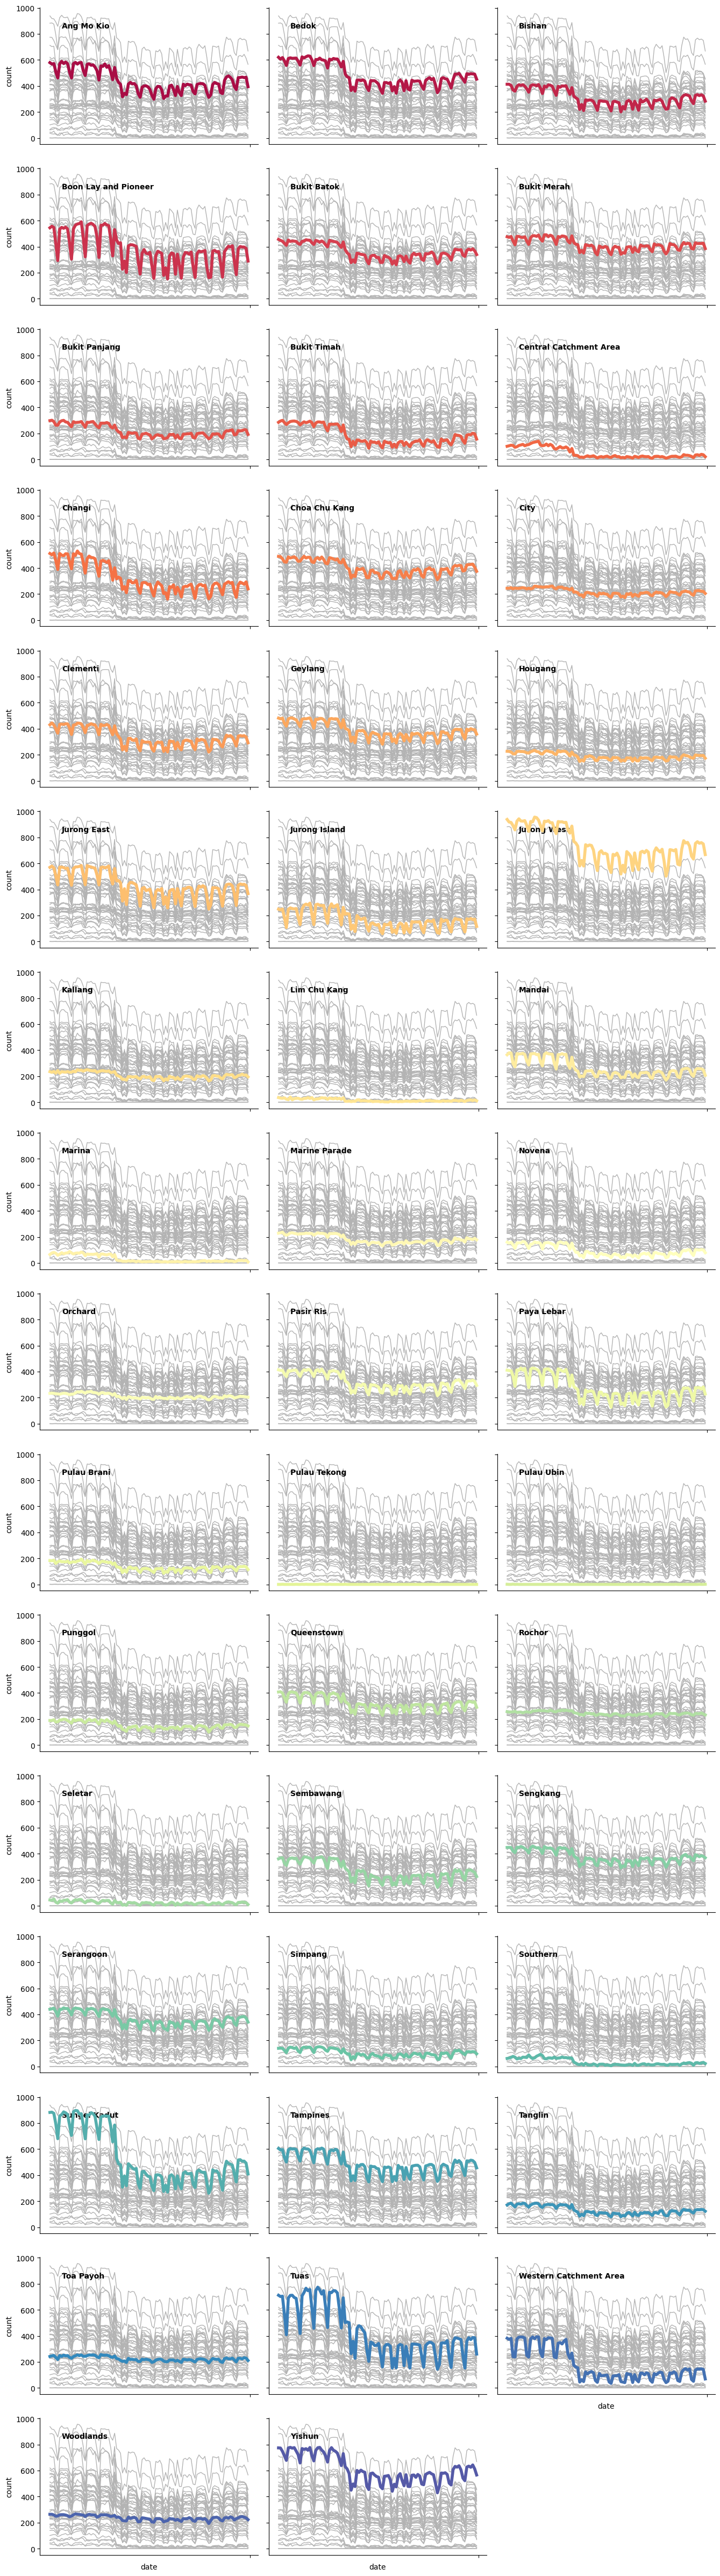

In [ ]:
g = sns.relplot(data = start, x = "date", y = "count",
                col = "start_polygon_name", hue = "start_polygon_name",
                kind = "line", palette = "Spectral",
                linewidth = 4, zorder = 5, col_wrap=3,height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = start, x = "date", y = "count", units="start_polygon_name",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

ax.set_xticks('')
g.set_titles("")
g.set_axis_labels("date", 'count')
g.tight_layout()